Name: Jay Goyal

Roll no.: C017

Semester: VI

Program: B.Tech

Branch: EXTC

Date of performance: 11th December

Date of Submission: 11th December

Experiment Number: 1

Aim =
1. To write a program in Python to implement spatial resolution(down-sampling and upsampling) and observe its effect.
2. To write a program in Python to reduce grey level resolution of the given image and
observe its effects.

Conclusion: From this experiment 1a we learnt how to upscale and downscale the image the image used here is the cameraman image and using experiment 1b we learnt how to Grey Scale an image we used 8 bits and we see the calrity as the bits number changes from a completely dark image to a completely clear image.

Collab link:https://colab.research.google.com/drive/12QcKKzn1ibH1lepiMkQpjsxKfH1im7oQ?usp=sharing


In [ ]:
#Importing all the required Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Read the image
img2 = cv2.imread('/content/cameraman.tif',0)

In [ ]:
#Determine the type of Image
type(img2)

numpy.ndarray

In [ ]:
#Get size of the image
[m,n]= img2.shape
print(m,n)

512 512


Up and Down Sampling

In [ ]:
#Ask for sampling rate for down sampling from the user
f = int(input("Enter the down sampling rate: "))

Enter the down sampling rate: 2


In [ ]:
#Downsample the image
img3=np.zeros((m//f,n//f),dtype=np.int)

for i in range(0,m,f):
  for j in range(0,n,f):
    try:
      img3[i//f][j//f] = img2[i][j]
    except IndexError:
      pass

In [ ]:
img3.shape

(256, 256)

In [ ]:
#Writing the image
cv2.imwrite('sampled_img.png',img3)

True

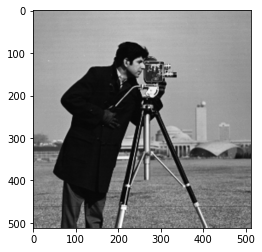

In [ ]:
plt.imshow(img2,cmap='gray')

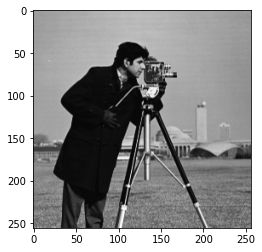

In [ ]:
plt.imshow(img3,cmap='gray')

In [ ]:
# to upsacle the image
img4=np.zeros((m , n),dtype=np.int)
for i in range(0, m-1, f):
  for j in range(0, n-1, f):
    img4[i,j]=img3[i//f][j//f]

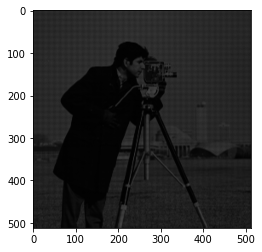

In [ ]:
plt.imshow(img4,cmap='gray')

In [ ]:
#Nearest  neighbour Replication.

#Replication Rows
for i in range(1, m-1, f):
  for j in range(0, n-1):
    img4[i,j]=img4[i-1,j]

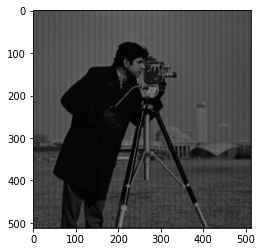

In [ ]:
plt.imshow(img4,cmap='gray')

In [ ]:
#Replication Columns
for i in range(0, m-1):
  for j in range(1, n-1, f):
    img4[i,j]=img4[i,j-1]

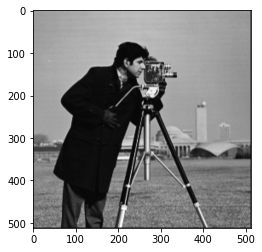

In [ ]:
plt.imshow(img4,cmap='gray')

Experiment 1b

Grey Level Sampling

In [ ]:
#Importing all the required Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Read the image
img2 = cv2.imread('/content/cameraman.tif',0)
img2


array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [ ]:
#By using img.shape we are trying to find the number of rows and columns in the image
[m,n]=img2.shape
print(m,n)

512 512


In [ ]:
#Ask for the number of bit in which a pixel has to be represented in the new image
b= int(input("Enter the number of bits for the new image"))

Enter the number of bits for the new image8


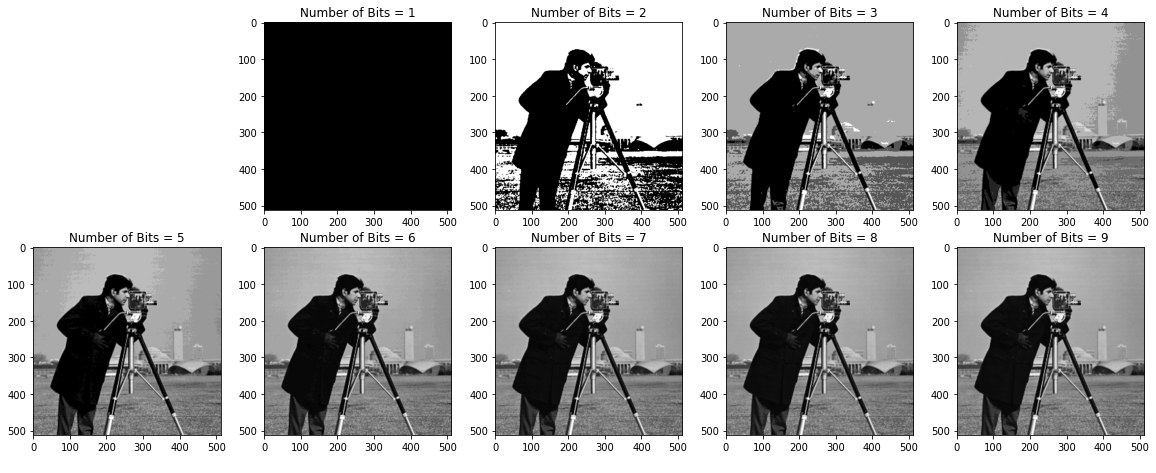

In [ ]:
#For a range of bits
fig = plt.figure(figsize=(20,20))

for b in range(1,10):
  img =np.zeros((m,n), dtype= np.int)
  for i in range(m):
    for j in range(n):
      img[i,j] = (2**b/512)*img2[i,j]

  ax = fig.add_subplot(5,5,b+1)
  
  plt.imshow(img,cmap='gray')
  plt.xlabel("Image width {} bits".format(b),color = 'w')
  plt.title("Number of Bits = {}".format(b))   